# KHÁM PHÁ DỮ LIỆU

Dữ liệu chứa trong file `tips.csv` chứa thông tin tiền tip của khách hàng tại một nhà hàng. Dữ liệu có các thông tin sau:

- `total_bill`: tổng hoá đơn (USD)
- `tip`: tiền tip/ tiền boa (USD)
- `sex`: giới tính người thanh toán hóa đơn
- `smoker`: có hút thuốc hay không
- `day`: ngày trong tuần
- `time`: thời gian dùng bữa(buổi sáng, buổi trưa, buổi tối)
- `size`: số lượng người tham gia

Bạn hãy thực hiện thống kê mô tả để tìm hiểu về hành vi tip của khách hàng tại nhà hàng

In [11]:
import pandas as pd
df = pd.read_csv("tips.csv")

## HIỂU DỮ LIỆU

1. Đọc dữ liệu
2. Xoá cột `Unnamed: 0`
3. Cho biết dữ liệu có bao nhiêu dòng, bao nhiêu thuộc tính.
4. Trong các thuộc tính, thuộc tính nào là thuộc tính phân loại, thuộc tính nào là thuộc tính định lượng
5. Có bao nhiêu nam, bao nhiêu nữ. Tỷ lệ bao nhiêu?
6. Có bao nhiêu người hút thuốc. Tỷ lệ bao nhiêu?
7. Ngày nào trong tuần khách hàng hay đến dùng bữa nhất. Tỷ lệ bao nhiêu?
8. Nhà hàng phục vụ bữa ăn nào nhiều nhất (Breakfast, Lunch, Dinner)?
9. Nhóm khách hàng dùng bữa tại nhà hàng nhiều nhất là bao nhiêu người?
10. Trung bình trong một bữa ăn nhà hàng phục vụ mấy khách?

In [13]:
print("Đọc dữ liệu") 
print(df.info()) 
print(df.head()) 

Đọc dữ liệu
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB
None
   Unnamed: 0  total_bill   tip     sex smoker  day    time  size
0           0       16.99  1.01  Female     No  Sun  Dinner     2
1           1       10.34  1.66    Male     No  Sun  Dinner     3
2           2       21.01  3.50    Male     No  Sun  Dinner     3
3           3       23.68  3.31    Male     No  Sun  Dinner     2
4           4       24.59  3.61  Female     No  Sun  Dinner     4


In [15]:
print("Xóa cột 'Unnamed: 0' nếu tồn tại") 
df.drop(columns=["Unnamed: 0"], inplace=True, errors="ignore")
print("Dữ liệu sau khi xóa")  
print(df.head())

Xóa cột 'Unnamed: 0' nếu tồn tại
Dữ liệu sau khi xóa
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [21]:
print("Cho biết dữ liệu có bao nhiêu dòng, bao nhiêu thuộc tính.") 
print(df.shape)

Cho biết dữ liệu có bao nhiêu dòng, bao nhiêu thuộc tính.
(244, 7)


In [25]:
print("Trong các thuộc tính, thuộc tính nào là thuộc tính phân loại, thuộc tính nào là thuộc tính định lượng") 
categorical = df.select_dtypes(include=['object']).columns.tolist()
numerical = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Thuộc tính phân loại:", categorical)
print("Thuộc tính định lượng:", numerical)

Trong các thuộc tính, thuộc tính nào là thuộc tính phân loại, thuộc tính nào là thuộc tính định lượng
Thuộc tính phân loại: ['sex', 'smoker', 'day', 'time']
Thuộc tính định lượng: ['total_bill', 'tip', 'size']


In [27]:
print("Có bao nhiêu nam, bao nhiêu nữ. Tỷ lệ bao nhiêu?") 
gender_counts = df["sex"].value_counts()
gender_ratio = df["sex"].value_counts(normalize=True) * 100
print(f"Số lượng Nam: {gender_counts['Male']}, Nữ: {gender_counts['Female']}")
print(f"Tỷ lệ Nam: {gender_ratio['Male']}%, Nữ: {gender_ratio['Female']}%")

Có bao nhiêu nam, bao nhiêu nữ. Tỷ lệ bao nhiêu?
Số lượng Nam: 157, Nữ: 87
Tỷ lệ Nam: 64.34426229508196%, Nữ: 35.65573770491803%


In [39]:
print("Có bao nhiêu người hút thuốc. Tỷ lệ bao nhiêu?") 
smoker_counts = df["smoker"].value_counts()
smoker_ratio = df["smoker"].value_counts(normalize=True) * 100

print(f"Số người hút thuốc: {smoker_counts['Yes']}")
print(f"Tỷ lệ hút thuốc: {smoker_ratio['Yes']} %")


Có bao nhiêu người hút thuốc. Tỷ lệ bao nhiêu?
Số người hút thuốc: 93
Tỷ lệ hút thuốc: 38.114754098360656 %


In [47]:
print("Ngày nào trong tuần khách hàng hay đến dùng bữa nhất. Tỷ lệ bao nhiêu?")
day_counts = df["day"].value_counts()
day_ratio = df["day"].value_counts(normalize=True) * 100
print(f"Ngày khách đến nhiều nhất: {day_counts.idxmax()} ({day_ratio.max():.2f}%)")


Ngày nào trong tuần khách hàng hay đến dùng bữa nhất. Tỷ lệ bao nhiêu?
Ngày khách đến nhiều nhất: Sat (35.66%)


In [69]:
print("Nhà hàng phục vụ bữa ăn nào nhiều nhất (Breakfast, Lunch, Dinner)?")
print(f"Nhà hàng phục vụ bữa ăn {df["time"].value_counts().idxmax()} nhiều nhất")

Nhà hàng phục vụ bữa ăn nào nhiều nhất (Breakfast, Lunch, Dinner)?
Nhà hàng phục vụ bữa ăn Dinner nhiều nhất
Nhà hàng phục vụ bữa ăn nhiều nhất: Dinner


In [73]:
print("Nhóm khách hàng dùng bữa tại nhà hàng nhiều nhất là bao nhiêu người?")
print(f"Nhóm khách hàng dùng bữa tại nhà hàng nhiều nhất là {df["size"].value_counts().idxmax()} người")

Nhóm khách hàng dùng bữa tại nhà hàng nhiều nhất là bao nhiêu người?
Nhóm khách hàng dùng bữa tại nhà hàng nhiều nhất là 2 người


In [81]:
print("Trung bình trong một bữa ăn nhà hàng phục vụ mấy khách?")
average_group_size = df["size"].mean()
print(f"Trung bình trong một bữa ăn nhà hàng phục vụ {df["size"].mean():.0f} khách")

Trung bình trong một bữa ăn nhà hàng phục vụ mấy khách?
Trung bình trong một bữa ăn nhà hàng phục vụ 3 khách


## YẾU TỐ ẢNH HƯỞNG ĐẾN TIỀN TIP

Trong phần này, chúng ta thử tìm hiểu về tiền tip tại nhà hàng và các yếu tố có thể ảnh hưởng đến nó

1. Tỷ lệ nhận được tiền tip của nhà hàng là bao nhiêu?
2. Tỷ lệ tiền tip trên tổng hóa đơn là bao nhiêu?
3. Giữa nam và nữ ai tip nhiều tiền hơn, ai tip thường xuyên hơn?
4. Giữa người hút thuốc và người không hút thuốc ai tip nhiều tiền hơn, ai tip thường xuyên hơn?
5. Thống kê tổng số tiền tip nhận được theo ngày.

In [107]:
tip_ratio = (df["tip"] > 0).mean() * 100
print(f"Tỷ lệ nhận được tiền tip của nhà hàng: {(df["tip"] > 0).mean() * 100}%")
print("\n")

print(f"Tỷ lệ tiền tip trên tổng hóa đơn: {(df["tip"].sum() / df["total_bill"].sum()) * 100 :.2f}%")
print("\n")

# print(df.groupby("sex")["tip"].mean())
avg_tip_gender = df.groupby("sex")["tip"].mean()
tip_frequency = df.groupby("sex")["tip"].apply(lambda x: (x > 0).mean() * 100)

print(f"Tiền tip trung bình của nam: {avg_tip_gender['Male']:.2f}, nữ: {avg_tip_gender['Female']:.2f}")
print(f"Tỷ lệ tip của nam: {tip_frequency['Male']:.2f}%, nữ: {tip_frequency['Female']:.2f}%")
print("\n")

avg_tip_smoker = df.groupby("smoker")["tip"].mean()
tip_frequency_smoker = df.groupby("smoker")["tip"].apply(lambda x: (x > 0).mean() * 100)

print(f"Tiền tip trung bình của người hút thuốc: {avg_tip_smoker['Yes']:.2f}, không hút thuốc: {avg_tip_smoker['No']:.2f}")
print(f"Tỷ lệ tip của người hút thuốc: {tip_frequency_smoker['Yes']:.2f}%, không hút thuốc: {tip_frequency_smoker['No']:.2f}%")
print("\n")

total_tip_by_day = df.groupby("day")["tip"].sum()
print("Thống kê tổng số tiền tip nhận được theo ngày: ", total_tip_by_day)

Tỷ lệ nhận được tiền tip của nhà hàng: 100.0%


Tỷ lệ tiền tip trên tổng hóa đơn: 15.15%


Tiền tip trung bình của nam: 3.09, nữ: 2.83
Tỷ lệ tip của nam: 100.00%, nữ: 100.00%


Tiền tip trung bình của người hút thuốc: 3.01, không hút thuốc: 2.99
Tỷ lệ tip của người hút thuốc: 100.00%, không hút thuốc: 100.00%


Thống kê tổng số tiền tip nhận được theo ngày:  day
Fri      51.96
Sat     260.40
Sun     247.39
Thur    171.83
Name: tip, dtype: float64


# TRỰC QUAN DỮ LIỆU

Để dễ hình dung, bạn hãy trực quan với một số câu hỏi sau đây:

1. Vẽ đồ thị thể hiện tổng tiền tip theo ngày
2. Vẽ đồ thị thể hiện tổng tiền tip theo bữa ăn (time)
3. Vẽ đồ thị histogram của tổng hoá đơn
4. Vẽ đồ thị boxplot của tổng hoá đơn
5. Vẽ đồ thị để kiểm tra sự liên quan giữa tổng hoá đơn và tiền tip.
6. So sánh số tiền mà khách hàng đã chi giữa các ngày trong tuần.

## Với Matplotlib

Bạn hãy trực quan với thư viện matplotlib

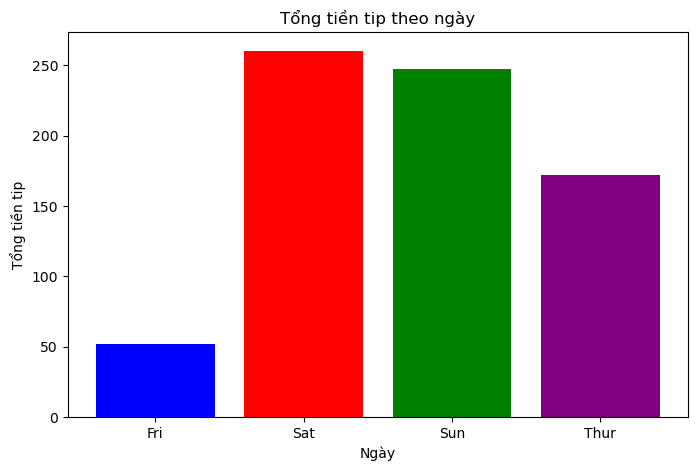

In [135]:
import matplotlib.pyplot as plt

# Tính tổng tiền tip theo ngày
tip_by_day = df.groupby("day")["tip"].sum()

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 5))
plt.bar(tip_by_day.index, tip_by_day.values, color=["blue", "red", "green", "purple"])
plt.xlabel("Ngày")
plt.ylabel("Tổng tiền tip")
plt.title("Tổng tiền tip theo ngày")
plt.show()

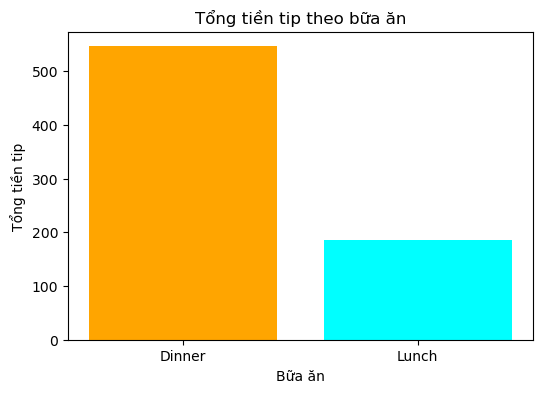

In [137]:
tip_by_time = df.groupby("time")["tip"].sum()

plt.figure(figsize=(6, 4))
plt.bar(tip_by_time.index, tip_by_time.values, color=["orange", "cyan"])
plt.xlabel("Bữa ăn")
plt.ylabel("Tổng tiền tip")
plt.title("Tổng tiền tip theo bữa ăn")
plt.show()

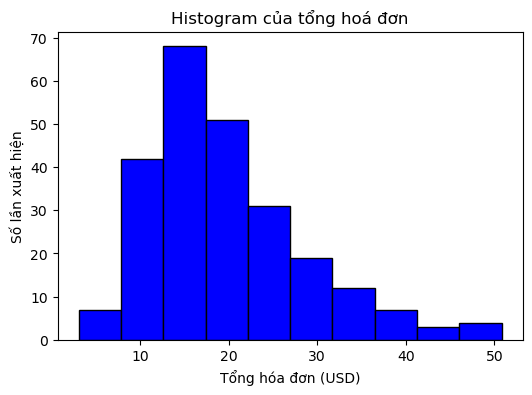

In [139]:
plt.figure(figsize=(6, 4))
plt.hist(df["total_bill"], bins=10, color="blue", edgecolor="black")
plt.xlabel("Tổng hóa đơn (USD)")
plt.ylabel("Số lần xuất hiện")
plt.title("Histogram của tổng hoá đơn")
plt.show()

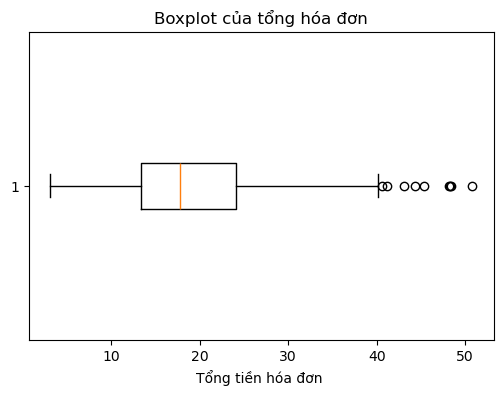

In [145]:
plt.figure(figsize=(6, 4))
plt.boxplot(df["total_bill"], vert=False)
plt.xlabel("Tổng tiền hóa đơn ")
plt.title("Boxplot của tổng hóa đơn")
plt.show()

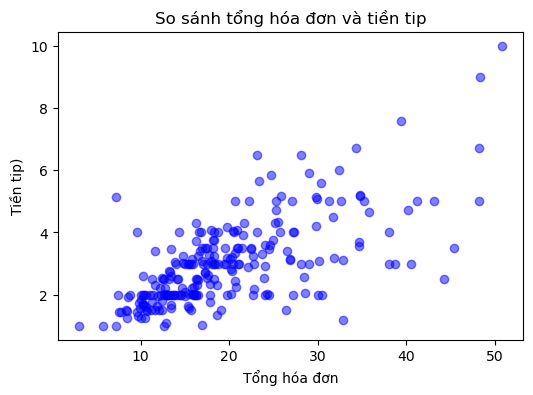

In [143]:
plt.figure(figsize=(6, 4))
plt.scatter(df["total_bill"], df["tip"], color="blue", alpha=0.5)
plt.xlabel("Tổng hóa đơn")
plt.ylabel("Tiền tip)")
plt.title("So sánh tổng hóa đơn và tiền tip")
plt.show()


## Với Seaborn

Bạn hãy tìm hiểu và trực quan với thư viện seaborn

In [149]:
import seaborn as sns

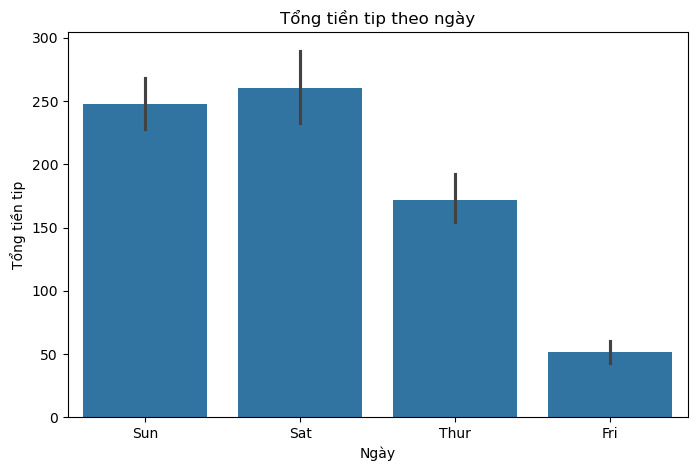

In [159]:
plt.figure(figsize=(8, 5))
sns.barplot(x="day", y="tip", data=df, estimator=sum)
plt.xlabel("Ngày")
plt.ylabel("Tổng tiền tip")
plt.title("Tổng tiền tip theo ngày")
plt.show()


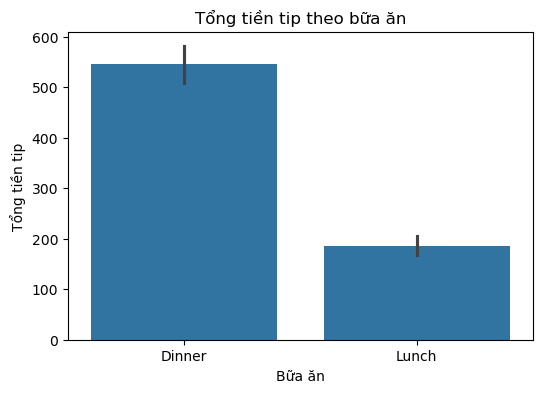

In [157]:
plt.figure(figsize=(6, 4))
sns.barplot(x="time", y="tip", data=df, estimator=sum)
plt.xlabel("Bữa ăn")
plt.ylabel("Tổng tiền tip")
plt.title("Tổng tiền tip theo bữa ăn")
plt.show()
